In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sklearn
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('CrabAgePrediction.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [6]:
data.isnull()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3888,False,False,False,False,False,False,False,False,False
3889,False,False,False,False,False,False,False,False,False
3890,False,False,False,False,False,False,False,False,False
3891,False,False,False,False,False,False,False,False,False


In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [8]:
data.shape

(3893, 9)

In [9]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Weight            False
Shucked Weight    False
Viscera Weight    False
Shell Weight      False
Age               False
dtype: bool

# DATA VISUALIZATION

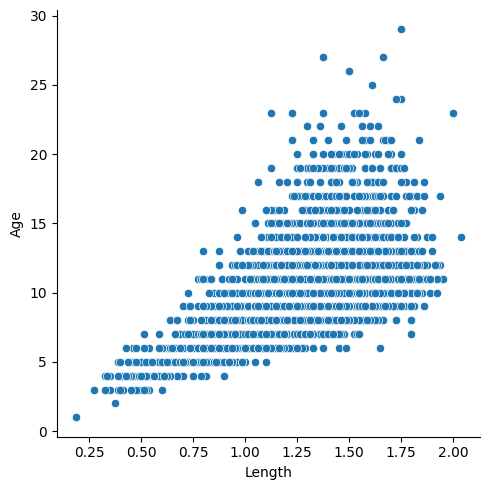

In [11]:
sns.relplot(x="Length",y="Age",data = data)

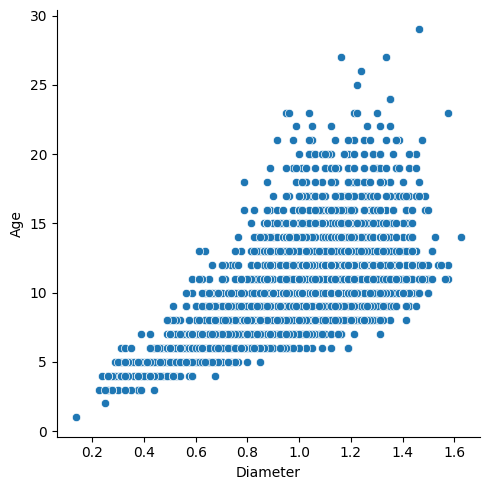

In [12]:
sns.relplot(x="Diameter",y="Age",data=data)

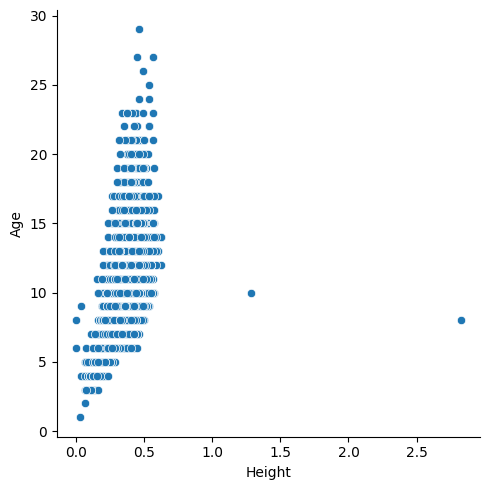

In [13]:
sns.relplot(x="Height",y="Age",data=data)

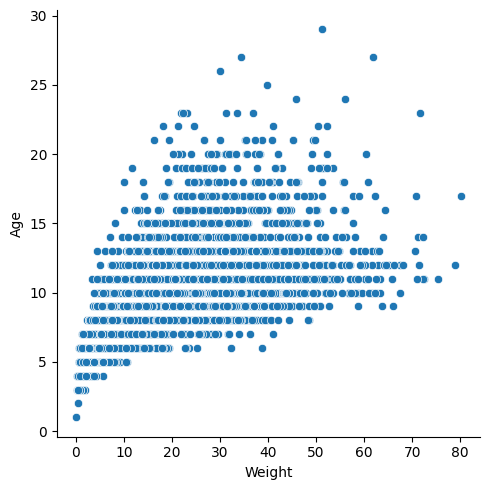

In [14]:
sns.relplot(x="Weight",y="Age",data=data)

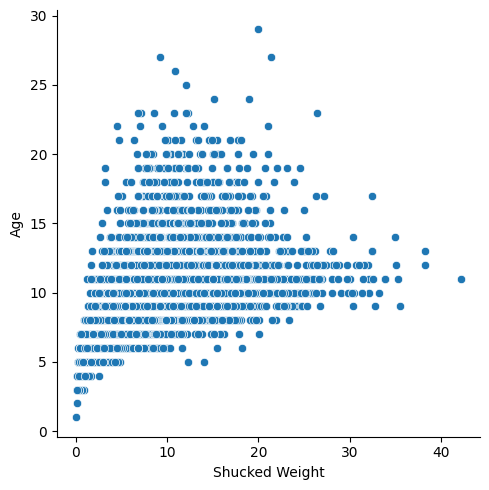

In [15]:
sns.relplot(x="Shucked Weight",y="Age",data=data)

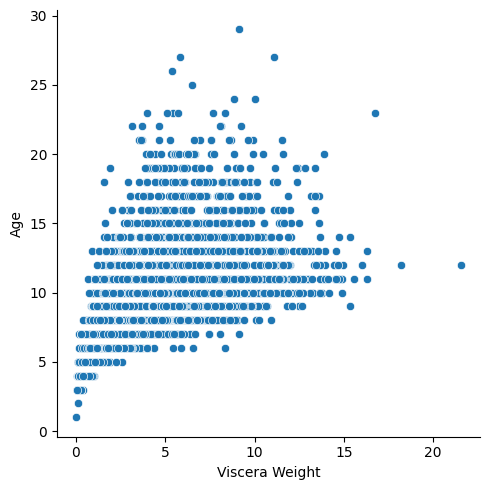

In [16]:
sns.relplot(x="Viscera Weight",y="Age",data=data)

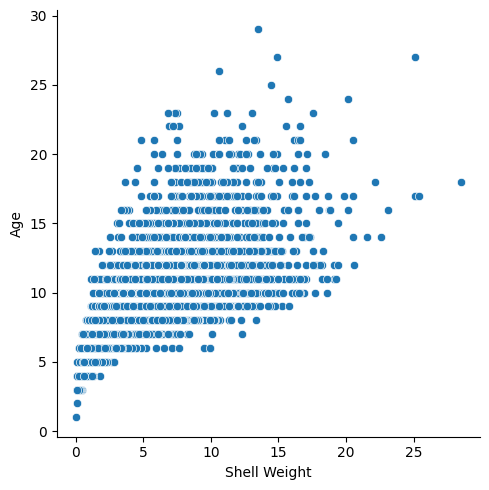

In [17]:
sns.relplot(x="Shell Weight",y="Age",data=data)

<Axes: xlabel='Sex', ylabel='count'>

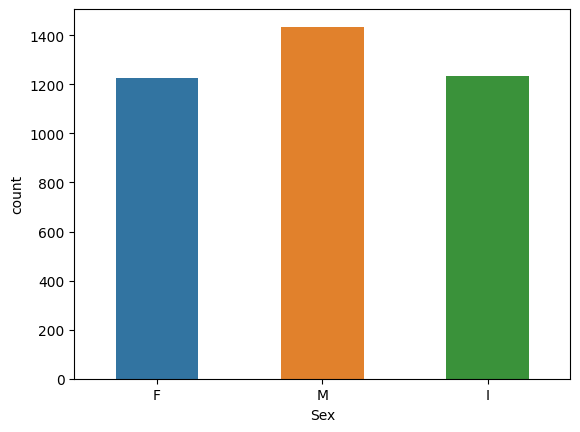

In [18]:
sns.countplot(x="Sex",data=data,width=0.5)

<Axes: xlabel='Age', ylabel='Count'>

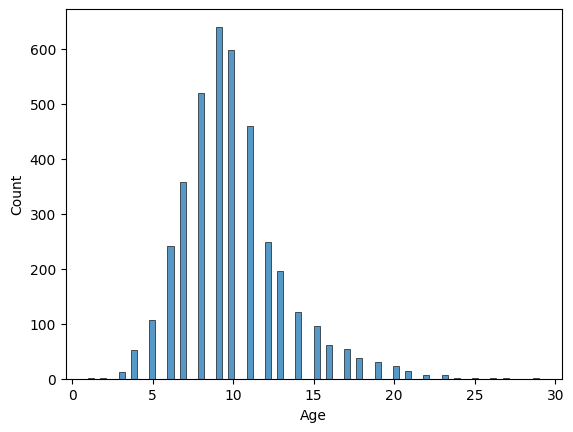

In [19]:
sns.histplot(x="Age",data=data)

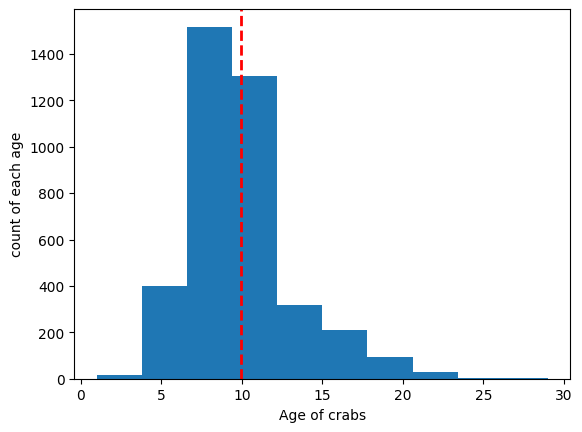

In [20]:
plt.hist(data["Age"]);
plt.axvline(data["Age"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.xlabel("Age of crabs")
plt.ylabel("count of each age")
plt.show()


# DATA MANIPULATION


In [1]:
le = LabelEncoder()
label = le.fit_transform(data["Sex"])

NameError: name 'LabelEncoder' is not defined

In [40]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [51]:
label

array([0, 2, 1, ..., 1, 1, 1])

In [24]:
data_new = data.drop("Sex",axis = 'columns')

In [25]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [41]:
data_new["Sex"] = label

In [42]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Female,Male,Intermediate,Sex
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0,2
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0,1
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0,1


In [44]:
onehot = OneHotEncoder()
data_sex_new = pd.DataFrame(onehot.fit_transform(data_new[['Sex']]).toarray())
data_new = data_new.join(data_sex_new)

In [45]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Female,Male,Intermediate,Sex,0,1,2
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0,0,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0,2,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0,1,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0,0,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0,1,0.0,1.0,0.0


In [46]:
data_new.drop(columns = ["Sex"],inplace = True)

In [47]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Female,Male,Intermediate,0,1,2
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
data_new=data_new.rename(columns={0:"Female",1:"Male",2:"Intermediate"})


In [49]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Female,Male,Intermediate,Female,Male,Intermediate
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0,0.0,1.0,0.0


<Axes: >

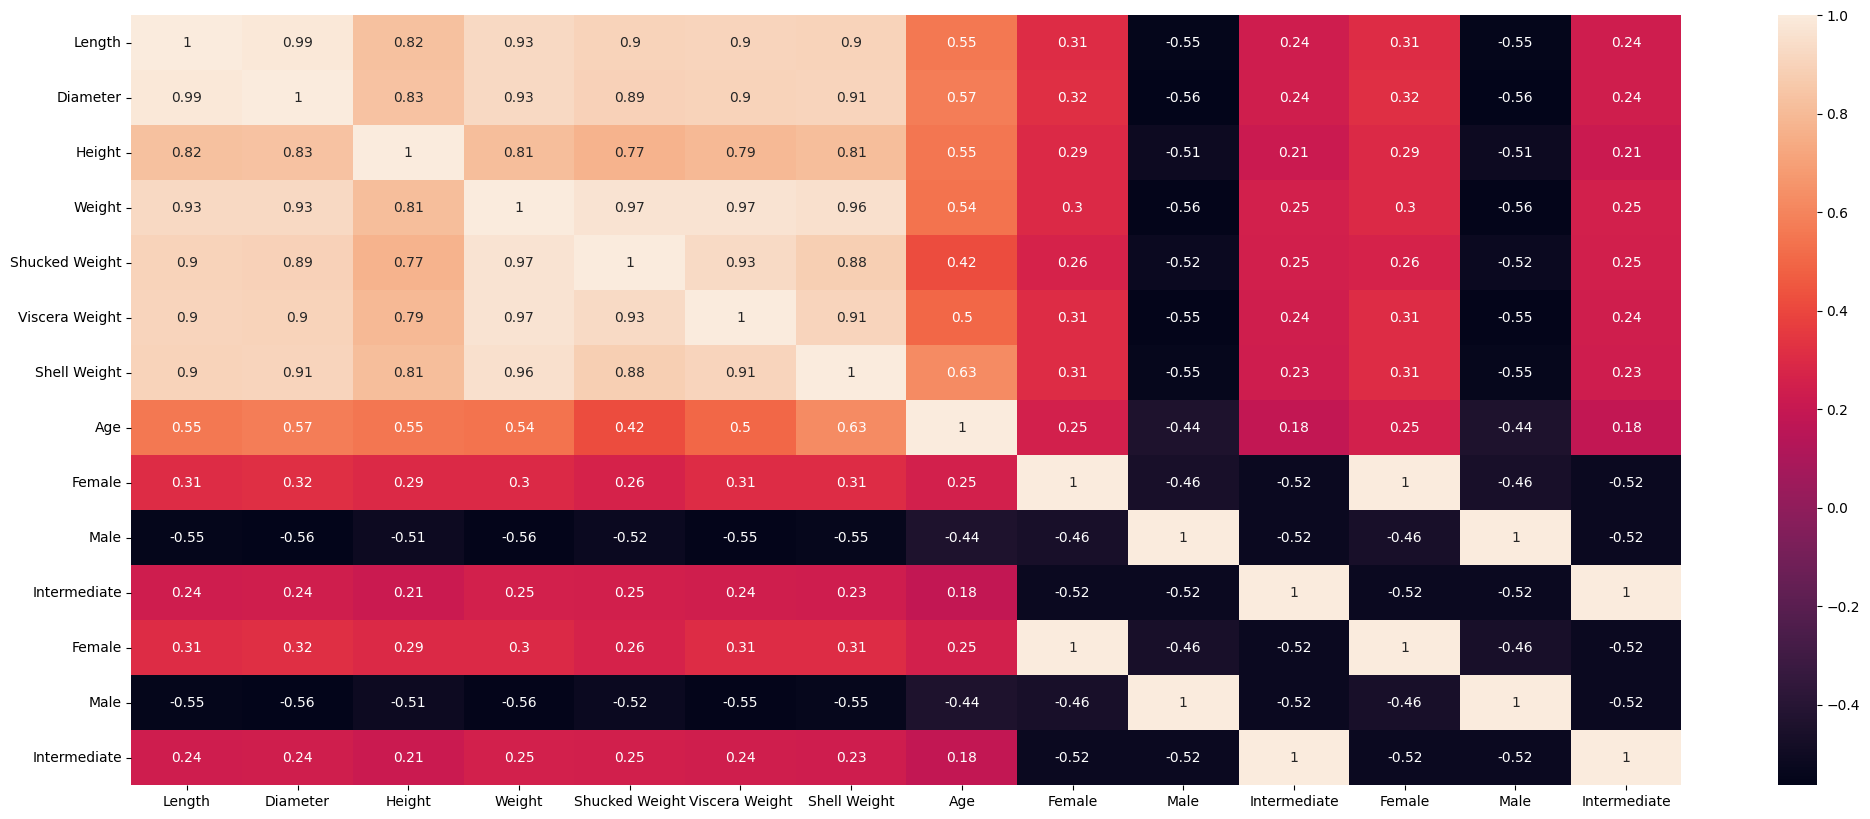

In [50]:
plt.figure(figsize = (25,10))
sns.heatmap(data_new.corr() , annot = True)

<Axes: xlabel='Weight'>

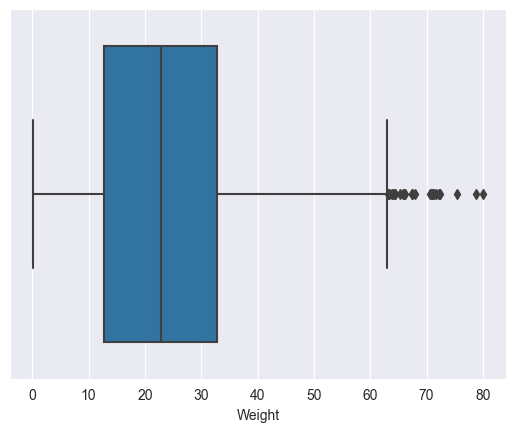

In [135]:
sns.set_style("darkgrid")
sns.boxplot(x="Weight",data = data)

<Axes: xlabel='Height'>

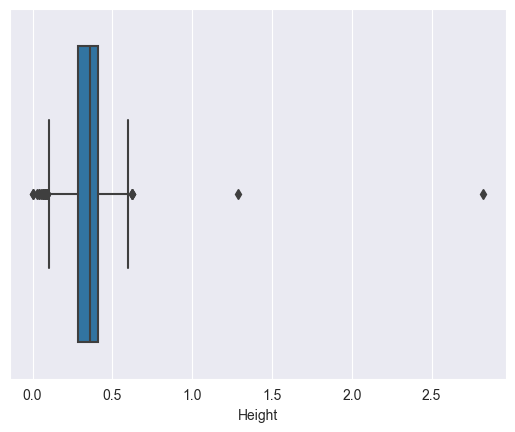

In [136]:
sns.set_style("darkgrid")
sns.boxplot(x="Height",data = data)

# PREPARING DATA FOR TRAINING

In [149]:
data_new.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Female,Male,Intermediate
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0


In [150]:
data_new.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Female', 'Male',
       'Intermediate'],
      dtype='object')

# Splitting the Data

In [156]:
x = data_new[["Length","Diameter","Height","Weight","Shucked Weight","Viscera Weight","Shell Weight","Female","Male","Intermediate"]]
y = data_new["Age"]

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [158]:
x_train.shape

(3114, 10)

In [159]:
x_test.shape

(779, 10)

In [160]:
y_train.shape

(3114,)

In [161]:
y_test.shape

(779,)

# Training Model

In [162]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [163]:
lm.intercept_

3.802308741168442

In [164]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
Length,-0.622133
Diameter,4.961933
Height,3.779713
Weight,0.357442
Shucked Weight,-0.726636
Viscera Weight,-0.442120
Shell Weight,0.271032
Female,0.243472
Male,-0.548904
Intermediate,0.305433


# Making predictions using test data

In [166]:
predictions =lm.predict(x_test)

# Model Metrics

In [167]:
from sklearn import metrics
print("MEA",metrics.mean_absolute_error(y_test,predictions))

MEA 1.5842563254741855


In [168]:
print("MSE",metrics.mean_squared_error(y_test,predictions))

MSE 4.859145605789455


In [169]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 2.204346979445263
